# Tutorial for using CRDipy

`crdipy` is a Python code that allows a user to: 

- Generate a set of UHECR events from a healpy map as they would be seen by the Pierre Auger Observatory, accounting for zenith cut and zenith selection criteria of the detector (function `generate_events`).

- Using the generated event set, evaluate the large scale dipole anistropy of the dataset (function `get_dipole`).

The detector constraints and Rayleigh analysis in this code follow the analysis of a large-scale dipole anisotropy for events > 8 EeV by the Pierre Auger Observatory. (Aab, A., et al. 2017, Science, 357, 1266,481 doi: 10.1126/science.aan4338482)

An example of similar code is provided by Auger Open Data (https://www.kaggle.com/code/augeropendata/large-scale-anisotropy/notebook) 

In [11]:
import numpy as np
import healpy as hp
import pylab as pl

Here we generate a sample Healpy skymap with some intermediate-scale structure.

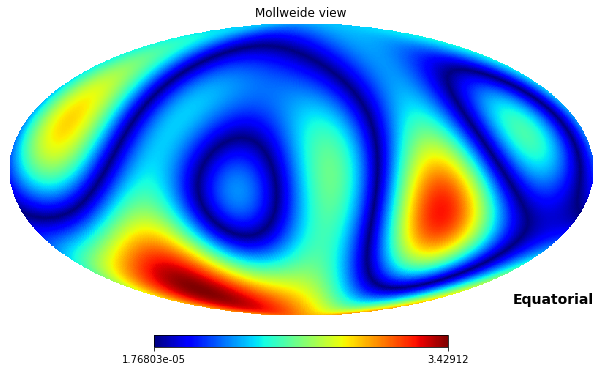

In [23]:
l = [1, 1, 1, 1]
inputMap = abs(hp.synfast(l, nside=128, new = True))
hp.mollview(map=inputMap, cmap = "jet", coord = 'C')

`generate_events` uses a Healpy skymap to generate a set of UHECR events from the perspective of the Pierre Auger Observatory, which is located at latitude -35°. In order to generate azimuthal and zenith angles of UHECR events, the events are assigned random hour angles. An event is chosen to be detected or discarded based on the zenith angle selection criteria of the observatory.

In [8]:
from crdipy import generate_events
generate_events?

In [6]:
events = generate_events(inputMap)

`get_dipole` uses Rayleigh analysis in right ascension and azimuthal angle of events to evaluate the large-scale dipole anisotropy

In [4]:
from crdipy import get_dipole
get_dipole?

In [7]:
get_dipole(events)

Cosmic ray dipole in equatorial coordinates 
 amplitude 67.15% 
 right ascension 240.59° 
 declination -40.62°


Events can be saved to a text file if an output file path is provided:

In [9]:
generate_events(inputMap, outfile = 'events.txt')

These events can then be readin and passed to `get_dipole`.

In [12]:
saved_events = pl.genfromtxt('events.txt', names = True)
get_dipole(saved_events)

Cosmic ray dipole in equatorial coordinates 
 amplitude 71.52% 
 right ascension 241.48° 
 declination -38.58°


Finally, if the input map is provided in Galactic coordinates, `generate_events` rotates the event coordinates to return right ascensions and declinations. The dipole result is still provided in equatorial coordinates.

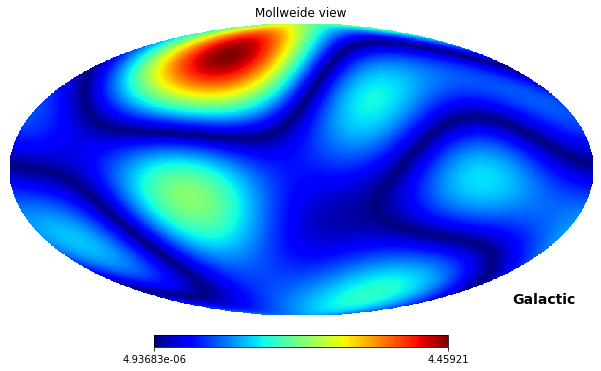

In [24]:
l = [1, 1, 1, 1]
inputMap_galactic = abs(hp.synfast(l, nside=128, new = True))
hp.mollview(map=inputMap_galactic, cmap = "jet", coord = 'G')

In [26]:
events2 = generate_events(inputMap_galactic, galCoord = True)

In [27]:
get_dipole(events2)

Cosmic ray dipole in equatorial coordinates 
 amplitude 44.02% 
 right ascension 118.26° 
 declination 84.0°
